In [27]:
# import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Healthcare data analysis

The data was obtained from kaggle. It is a sample data set created by Faker library. It was created to provide a glimpse at actual healthcare data sets for individuals to use for practice and familiarisation with healthcare data. 
Healthcare data is sensitive and burdened with the need for privacy and therefore difficult to come by. 
But libraries such as Faker can provide a solution for practice data sets.
I have personally never analyzed healthcare data. This is for learning purposes. I don't know the practices used, statistical analyses carried out, but this is supposed to help me learn practically. The data is also soemwhat big so I also learn how to analyze big data.

PS: Fuck Fear and Imposter Syndrome, and I mean that.

## Goals of this analysis
- Explore the data
- Figure out the length of stay of each patient
- Compare this with the medical condition
- Compare the hospital to the medical condition - to figure out if there is a pattern like a hospital specializes in something
- Compare doctor and medical condition - trying to see specialization also
- Compare age and gender to medical condition
- Compare insurance provider, billing amount and medical condition and age

In [3]:
##read my data into a dataframe
df = pd.read_csv("data/healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [8]:
## Exploratory data analysis
df.head()

#check out all the columns
df.columns

#summary statistics using describe
#df.describe()

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

- The data has 55500 rows and 15 columns
- The youngest patient is 13 years old, and the oldest is 89
- The average age is 51-52 years
- The statistics are for just three columns age, billing and room number. I don't think the room number stats are important
- From examining the columns, there are some things I am assuming I wouldn't need for my analysis. Things like the doctor name, unless they can help link to hospital, pin point some speciality based on the disease they treat. Writing this I realize that I may actually need it so I will keep it.

In [18]:
# get the distributions of the data
df['Age'].value_counts()
df['Gender'].value_counts()
#df['Blood Type'].value_counts()
#df['Medical Condition'].value_counts()
#df['Admission Type'].value_counts()
#df['Date of Admission'].value_counts()
#df['Discharge Date'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

<Axes: xlabel='Gender'>

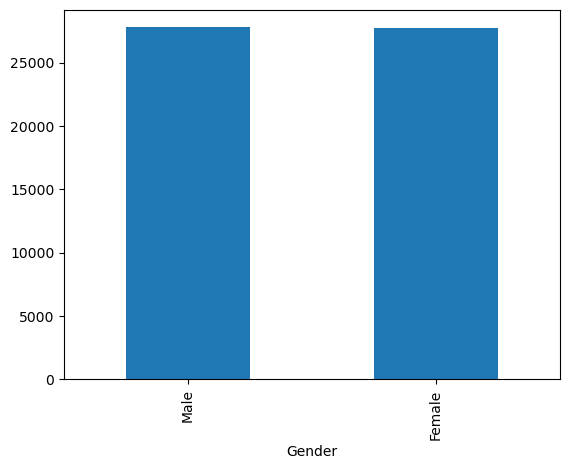

In [19]:
df['Gender'].value_counts().plot.bar()

In [21]:
#would be nice to aggregate the age. plotting it with just age has a dirty diagram (but a bar graph that is). Trying out other forms.
df['Age'].value_counts()

Age
38    897
37    893
57    887
80    864
34    864
     ... 
88     25
16     24
14     18
13     14
89      8
Name: count, Length: 77, dtype: int64

In [24]:
print("Mean: {}".format(df['Age'].mean()))
print("Median: {}".format(df['Age'].median()))
print("Mode: {}".format(df['Age'].mode()))

Mean: 51.53945945945946
Median: 52.0
Mode: 0    38
Name: Age, dtype: int64


<Axes: >

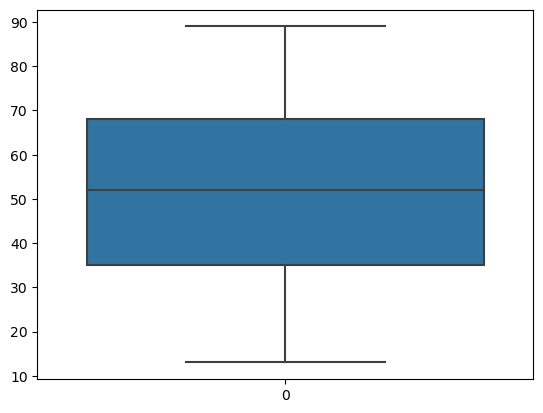

In [28]:
df['Age'].plot.box()
sns.boxplot(df['Age']) ##seaborn library visualizes boxplots much better

In [56]:
## Get each patient's date of admission
from datetime import datetime
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%Y-%m-%d')
df['Discharge Date']

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%Y-%m-%d')
df['Date of Admission']

duration_of_admission = df['Discharge Date'] - df['Date of Admission']
duration_of_admission

## Add this duration column to the dataframe
df['Duration of stay (days)'] = duration_of_admission
df.columns


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Duration of stay',
       'Duration of stay (days)'],
      dtype='object')

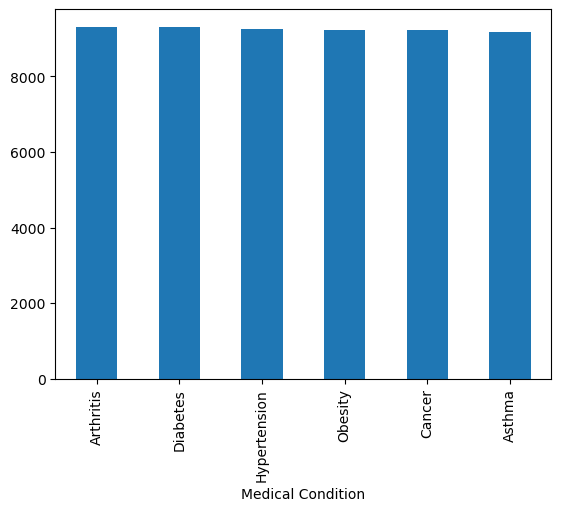

Medical Condition
Arthritis       15.517404
Asthma          15.696570
Cancer          15.495827
Diabetes        15.422936
Hypertension    15.458626
Obesity         15.464305
Name: Duration of stay (days), dtype: float64

In [83]:
## Plot disease against duration of stay
#df.head()
#df.drop('Duration of stay', axis=1, inplace=True)
condition_counts = df['Medical Condition'].value_counts()
condition_counts.plot(kind='bar')
plt.show()

##aggregate the medical conditions using groupby
mean_duration = df.groupby('Medical Condition')['Duration of stay (days)'].mean()
mean_duration

#sum_duration = df.groupby('Medical Condition')['Duration of stay (days)'].sum()
#sum_duration


At this point I realized I have to convert my days into integers rather than the timedate format they are stored in when you do the subtraction and get days. 

In [79]:
#df['Duration of stay (days)'] = df['Duration of stay (days)'].dt.total_seconds() / (24*3600)
df['Duration of stay (days)']

0         2.0
1         6.0
2        15.0
3        30.0
4        20.0
         ... 
55495    30.0
55496     9.0
55497    28.0
55498     6.0
55499    27.0
Name: Duration of stay (days), Length: 55500, dtype: float64

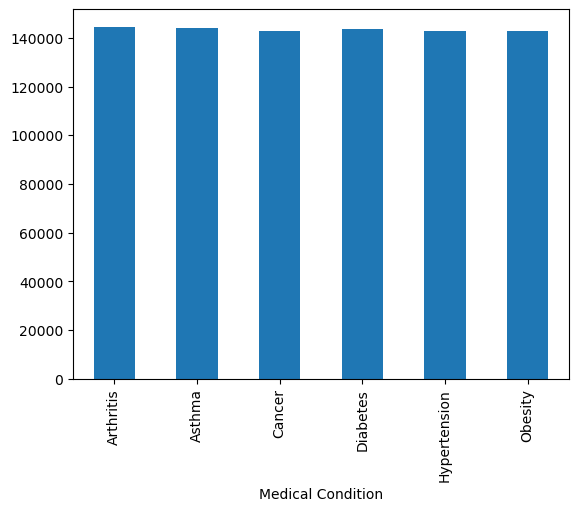

In [82]:
sum_duration2 = df.groupby('Medical Condition')['Duration of stay (days)'].sum()
sum_duration2.plot(kind='bar')
plt.show()

Note: This data is maybe not showing a realistic representation of real-world scenarios. This is cool, I am just using the data to learn.